## State feedback of LTI system
Reference:  
[1] http://y373.sakura.ne.jp/minami/pyctrl  
[2] "Pythonによる制御工学入門(第1版)", 南裕樹, オーム社  
[3] "Control Engineering: MATLAB Exercies", Laszlo.K et al, Springer

Let us design the controller for the LTI system such that:
$$
\dot{\boldsymbol{x}} = \boldsymbol{Ax} + \boldsymbol{B}u
$$

Assuming all the states are observable and controllable, the input is designed as:
$$
u = -\boldsymbol{Fx}
$$
$\boldsymbol{F}$ is called "state feedback gain."

This being said, how do we design the feedback gain? We have two possible answers for this: pole placement, and optimal regulator.

### Pole placement method
Assuming that we apply the state feedback $u = -\boldsymbol{Fx}$ to the above system, we get:
$$
\boldsymbol{\dot{x}} = (\boldsymbol{A-BF})\boldsymbol{x}
$$

This system stablizes if all the real parts of eigenvalues of $\boldsymbol{A-BF}$ are negative. Pole placement method designs the feedback gain $\boldsymbol{F}$ so that it satisfies this condition. Python-control provides the useful library called "ackerman's pole placement algorithm".
This enables us to design the response to behave desirablly.

In [1]:
import control.matlab as ctrl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

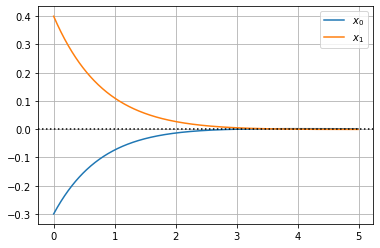

In [7]:
# ackerman's pole placement algorithm

A = '0 1; -4 5'
B = '0; 1'
C = '1 0; 0 1'
D = '0; 0'

P = ctrl.ss(A, B, C, D)
Pole = [-1, -1]  # poles are arbitrarily placed here

F = ctrl.acker(P.A, P.B, Pole)

Acl = P.A - P.B*F
Pfb = ctrl.ss(Acl, P.B, P.C, P.D)

Td = np.arange(0, 5, 0.01)
X0 = [-0.3, 0.4]  # initial state
x, t = ctrl.initial(Pfb, Td, X0)

plt.plot(t, x[:,0], label="$x_0$")
plt.plot(t, x[:,1], label="$x_1$")
plt.grid()
plt.axhline(0, linestyle=":", color="k")
plt.legend()
plt.show()

In [8]:
# let's check if F actually yields pole = [-1, -1]

print(np.linalg.eigvals(P.A-P.B*F))

[-1. -1.]


### Optimal regulator design

We have discussed the designablility of the poles of the system. But this leaves a few problems such as:

1. Increasing a real-negative value of eigenvalues improves its response, but it makes feedback gain $F$ larger at the same time
2. Some of the state variables might oscillates.

This being said, an optimal regulator design tackles this problem. Assuming $\boldsymbol{Q} = \boldsymbol{Q}^T > 0$ and $\boldsymbol{R} = \boldsymbol{R}^T > 0$, we can define a scholar evaluation function:
$$
J = \int_{0}^{\infty} \boldsymbol{x}^T(t) \boldsymbol{Q} \boldsymbol{x}(t) + u^T(t)\boldsymbol{R}u(t)dt
$$
The controller that minimizes $J$ is the optimal controller for the system and called an optimal controller.

Such a controller $u = \boldsymbol{F_{opt}x}$ is given by solving:
$$
\boldsymbol{F_{opt}} = -\boldsymbol{R}^{-1} \boldsymbol{B}^T \boldsymbol{P}
$$

$\boldsymbol{P}$ is given as a solution of Ricatti equation:
$$
\boldsymbol{A}^T\boldsymbol{P} + \boldsymbol{PA} + \boldsymbol{PBR}^{-1}\boldsymbol{B}^T\boldsymbol{P} + \boldsymbol{Q} = 0
$$

(The later part is yet to be added since slycot is not functioning on my environment now.)